<a href="https://colab.research.google.com/github/adamschmideg/ethereum/blob/master/travis/Visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [0]:
url = "https://raw.githubusercontent.com/adamschmideg/ethereum/master/travis/data/"
converters = {'StartedAt': pd.to_datetime, 'FinishedAt': pd.to_datetime}
builds = pd.read_csv(url + "builds.csv", converters=converters)
jobs = pd.read_csv(url + "jobs.csv", converters=converters)
failures = pd.read_csv(url + "failures.csv")

In [0]:
bj = pd.merge(builds, jobs, left_on="Id", right_on="BuildId", suffixes=("_Build", "_Job"))
full = pd.merge(bj, failures, left_on="Id_Job", right_on="JobId")

Filter rows with a failed job that belong to builds where it was pushed to master

In [0]:
cutoff_date = '2020-03-16'


In [16]:
df = full[['Test', 'PullRequestNumber']].groupby(by='Test').nunique()
not_one_pr = df[df.PullRequestNumber.ne(1)].Test.keys().values
df = full[full.StartedAt_Build >= cutoff_date] \
    [full.State_Job != "passed"] \
    [full.Test.isin(not_one_pr)]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
flaky = df[['Package', 'Test', 'Id_Job']] \
    .groupby(['Test']) \
    .agg({'Id_Job': ['first', 'count']})
flaky.columns = ['JobId', 'Count']
flaky.reset_index()
flaky['url'] = flaky.apply(lambda row: 'https://travis-ci.org/github/ethereum/go-ethereum/jobs/{}'.format(row.JobId), axis=1)
flaky = flaky.sort_values(['Count'], ascending=False)
pd.options.display.max_colwidth = 260
flaky.head(20)

,JobId,Count,url
Test,,,
TestTimerFunc,669160780,13,https://travis-ci.org/github/ethereum/go-ethereum/jobs/669160780
TestBoundedHeavyForkedSync63Fast,669570148,12,https://travis-ci.org/github/ethereum/go-ethereum/jobs/669570148
TestBroadcastBlock,669289371,12,https://travis-ci.org/github/ethereum/go-ethereum/jobs/669289371
TestBoundedHeavyForkedSync64Fast,668816462,8,https://travis-ci.org/github/ethereum/go-ethereum/jobs/668816462
TestBoundedForkedSync63Fast,669527255,5,https://travis-ci.org/github/ethereum/go-ethereum/jobs/669527255
TestHandshake,669132706,5,https://travis-ci.org/github/ethereum/go-ethereum/jobs/669132706
TestCustomGenesis,667148875,5,https://travis-ci.org/github/ethereum/go-ethereum/jobs/667148875
TestState,662976951,5,https://travis-ci.org/github/ethereum/go-ethereum/jobs/662976951
TestBoundedForkedSync64Fast,669534995,5,https://travis-ci.org/github/ethereum/go-ethereum/jobs/669534995


## Number of failing tests by date

In [0]:
failures_by_date = full[full.State_Job.eq('failed') & full.EventType.eq('push') & full.State_Job.gt(cutoff_date)][['Id_Build']].groupby(by=full.StartedAt_Build.dt.week).count().sort_values(by='StartedAt_Build', ascending=True)

<Figure size 1332x756 with 0 Axes>

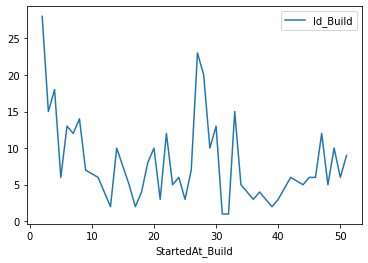

In [19]:
# figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
failures_by_date.plot()
plt.show()